<a href="https://colab.research.google.com/github/Knightler/deep-learning-practice/blob/main/neural_network_practice_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [44]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

len(trainset), len(testset)

(60000, 10000)

In [45]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7b258ad9d550>,
 <torch.utils.data.dataloader.DataLoader at 0x7b25896dd1d0>)

In [46]:
image, label = trainset[0]
image.shape, label

(torch.Size([1, 28, 28]), 5)

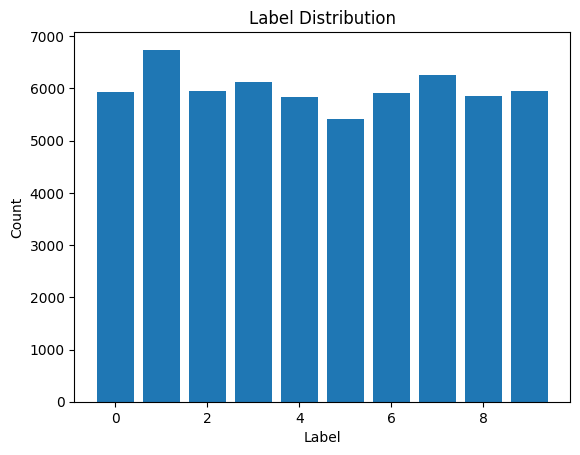

In [34]:
import collections

labels = [label for _, label in trainset]
counter = collections.Counter(labels)

plt.bar(counter.keys(), counter.values())
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

In [35]:
image, label = trainset[0]
flattened = image.view(-1)  # Convert from [1, 28, 28] → [784]
print(flattened.shape)  # torch.Size([784])

torch.Size([784])


In [36]:
image, label = trainset[0]
print(image.min(), image.max())  # Output: tensor(-1.) tensor(1.)

tensor(-1.) tensor(1.)


In [37]:
images, labels = next(iter(train_loader))  # Get first batch
print(images.shape)  # Output: torch.Size([32, 1, 28, 28])
print(labels.shape)  # Output: torch.Size([32])

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [38]:
# Without normalization
transform_no_norm = transforms.Compose([transforms.ToTensor()])
trainset_no_norm = torchvision.datasets.MNIST(root='./data', train=True, transform=transform_no_norm, download=True)

# Get an image and check its range
image, label = trainset_no_norm[0]
print(image.min(), image.max())  # Output: tensor(0.) tensor(1.)

tensor(0.) tensor(1.)


In [39]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(in_features=1*28*28, out_features=512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(in_features=512, out_features=256)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(in_features=256, out_features=10)

    def forward(self, x):
        x = x.view(-1, 1*28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [40]:
model_0 = NeuralNetwork()
model_0

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [41]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_0.parameters(), lr=0.001)

In [47]:
torch.manual_seed(42)

epochs = 5

for epoch in range(epochs):
    model_0.train()

    for image, label in train_loader:
        y_pred = model_0(image)
        loss = loss_fn(y_pred, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    correct = 0
    total = 0

    model_0.eval()
    with torch.inference_mode():
        test_loss = 0
        for images, labels in test_loader:
            test_pred = model_0(images)  # Get predictions
            test_loss += loss_fn(test_pred, labels)

            _, predicted = torch.max(test_pred, 1)  # Get predicted class
            correct += (predicted == labels).sum().item()  # Count correct predictions
            total += labels.size(0)  # Count total samples

        test_loss /= len(test_loader)  # Average loss
        accuracy = 100 * correct / total  # Accuracy in percentage

    print(f"Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")

Test Loss: 0.1515, Accuracy: 95.03%
Test Loss: 0.1075, Accuracy: 96.76%
Test Loss: 0.1042, Accuracy: 96.74%
Test Loss: 0.0962, Accuracy: 96.96%
Test Loss: 0.0992, Accuracy: 97.22%


In [49]:
torch.save(model_0.state_dict(), 'mnist_nn.pth')  # Save model
model_0.load_state_dict(torch.load('mnist_nn.pth'))  # Load model

<ipython-input-49-569668d1fb63>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_0.load_state_dict(torch.load('mnist_nn.pth'))  # Load model


<All keys matched successfully>